In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import pandas as pd
import prettyplotlib as ppl
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from matplotlib import rc
from pls_m4 import h_ab, h_c, t_ab, t_c
rc('font', **{'family': 'serif', 'serif': ['Computer Modern Roman'], 'size':14})
rc('text', usetex=True)

In [2]:
# read in dataframe
df = pd.read_csv('final_data_files/uncrowded_everything_m4_clipped.csv')#_clipped.csv')

# show column names for reference
print df.columns.values

df['log_per'] = np.log10(df.per)
df_ab = df[df.type==0]
df_c = df[df.type==1]
df_spect = df[np.isfinite(df.spectfeh)]# & np.isfinite(df.mag_h)]
df_phot = df[np.isfinite(df.photfeh)]# & np.isfinite(df.mag_h)]

df_s_ab = df_ab[np.isfinite(df_ab.spectfeh)]# & np.isfinite(df_ab.mag_h)]
df_s_c = df_c[np.isfinite(df_c.spectfeh)]# & np.isfinite(df_c.mag_h)]
df_p_ab = df_ab[np.isfinite(df_ab.photfeh)]# & np.isfinite(df_ab.mag_h)]
df_p_c = df_c[np.isfinite(df_c.photfeh)]# & np.isfinite(df_c.mag_h)]

def add_nums(df, feh_name):
    df.loc[500]=np.zeros(23)
    df.loc[501]=np.zeros(23)
    df.loc[500, feh_name] = -0.78
    df.loc[501, feh_name] = -2.12
    return df

df_s_ab = add_nums(df_s_ab, 'spectfeh')
df_s_c = add_nums(df_s_c, 'spectfeh')
df_p_ab = add_nums(df_p_ab, 'photfeh')
df_p_c = add_nums(df_p_c, 'photfeh')

['id' 'type' 'per' 'mag_j' 'merr_j' 'mag_h' 'merr_h' 'mag_k' 'merr_k'
 'mag_3' 'merr_3' 'mag_4' 'merr_4' 'resid_m4_j' 'resid_m4_h' 'resid_m4_k'
 'resid_m4_3' 'resid_m4_4' 'photfeh' 'photfeh_err' 'spectfeh'
 'spectfeh_err']


/Users/mdurbin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mdurbin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mdurbin/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/mdurbin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.p

In [3]:
pls = [h_ab, h_c, t_ab, t_c]

plus_factor = -1

h_ab_dist = 13.8003904239 + plus_factor
h_c_dist = 13.8272033737 + plus_factor
t_ab_dist = 13.7503311889
t_c_dist = 13.8380616047

dist = [h_ab_dist, h_c_dist, t_ab_dist, t_c_dist]

h_ab_sig = np.nanstd(df_ab.resid_m4_h)
h_c_sig = np.nanstd(df_c.resid_m4_h)
t_ab_sig = np.nanstd(df_ab.resid_m4_3)
t_c_sig = np.nanstd(df_ab.resid_m4_3)

sig = [h_ab_sig, h_c_sig, t_ab_sig, t_c_sig]

x_ab = np.linspace(-0.31, 0, 2)
x_c = np.linspace(-0.625, -0.27, 2)

x = [x_ab, x_c, x_ab, x_c]

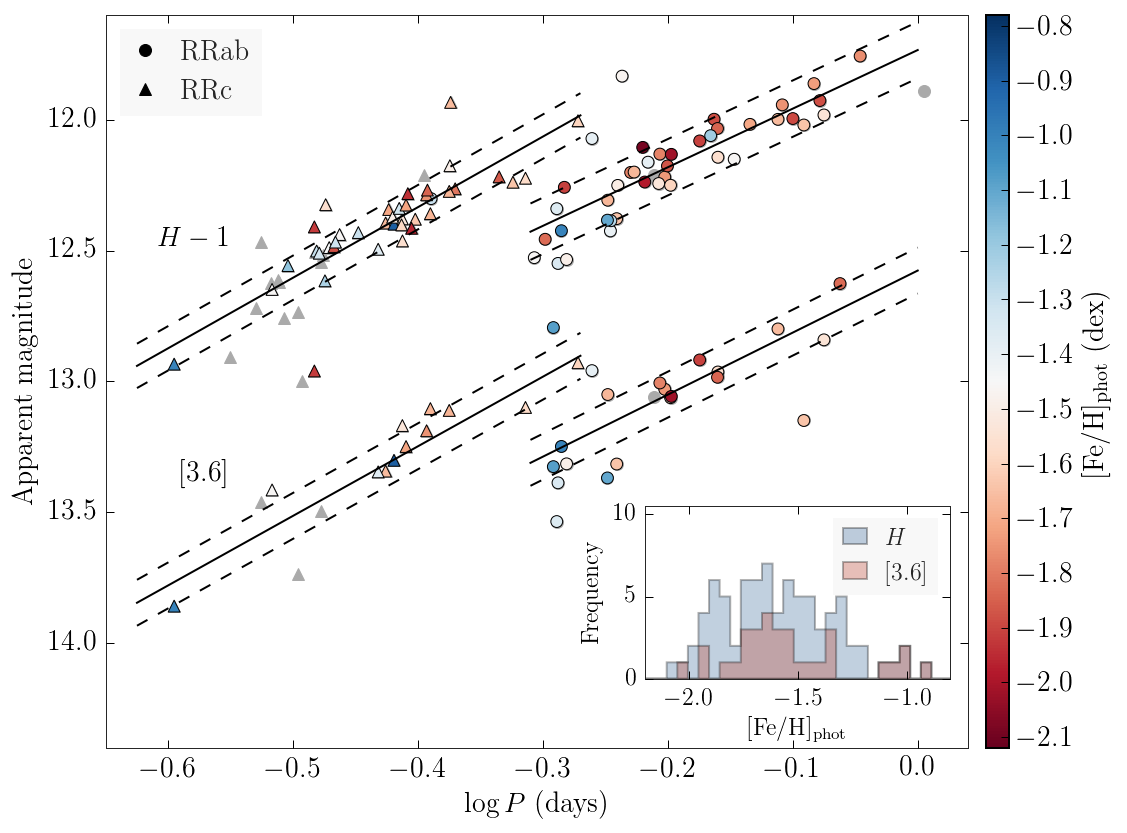

In [4]:
fig, ax1 = plt.subplots(1,1,figsize=(8,6))
ppl.plot(ax1, df_ab.log_per, df_ab.mag_h + plus_factor, 'o', color='#AAAAAA', mec='#AAAAAA', zorder=-1)
ppl.plot(ax1, df_c.log_per, df_c.mag_h + plus_factor, '^', color='#AAAAAA', mec='#AAAAAA', zorder=-1)
ppl.plot(ax1, df_ab.log_per, df_ab.mag_3.values, 'o', color='#AAAAAA', mec='#AAAAAA', zorder=-1)
ppl.plot(ax1, df_c.log_per, df_c.mag_3.values, '^', color='#AAAAAA', mec='#AAAAAA', zorder=-1)
#x = np.linspace(-1,0.5,5)
#y = -2.3*(x + 0.3) + 13.4
for i in range(4):
    y = pls[i](x[i], dist[i])
    ax1.plot(x[i],y,'k-')
    ax1.plot(x[i],y+sig[i],'k--')
    ax1.plot(x[i],y-sig[i],'k--')
s1 = ax1.scatter(df_p_ab.log_per, df_p_ab.mag_h + plus_factor, c=df_p_ab.photfeh, s=35, lw=0.5, cmap='RdBu')
ax1.scatter(df_p_c.log_per, df_p_c.mag_h + plus_factor, c=df_p_c.photfeh, marker='^', s=35, lw=0.5, cmap='RdBu')
s1 = ax1.scatter(df_p_ab.log_per, df_p_ab.mag_3, c=df_p_ab.photfeh, s=35, lw=0.5, cmap='RdBu')
ax1.scatter(df_p_c.log_per, df_p_c.mag_3, c=df_p_c.photfeh, marker='^', s=35, lw=0.5, cmap='RdBu')
ax1.set_ylim(14.4,11.6)
ax1.set_xlim(-0.65, 0.04)
ax1.set_ylabel('Apparent magnitude')
ax1.set_xlabel('$\log P$ (days)')

fig.tight_layout()

pos1 = ax1.get_position()

minus_factor = 0.12

pos1.x1 -= minus_factor

ax1.set_position(pos1)

cax = fig.add_axes([0.99 - minus_factor, pos1.y0, 0.02, (pos1.y1 - pos1.y0)])
fig.colorbar(s1, ticks=np.linspace(-0.8,-2.1,14), cax=cax, label='[Fe/H]$_\mathrm{phot}$ (dex)')

smfont = 12

ax3 = fig.add_axes([pos1.x1 - 0.28, pos1.y0 + 0.08, 0.265, 0.2])
ax3.set_xlim(-2.2,-0.8)
ax3.set_xticks(np.linspace(-1,-2,3))
ax3.set_ylim(0,10.5)
ax3.set_yticks(np.linspace(0,10,3))
ppl.plot(ax3, [], [])

ax3.tick_params(axis='both', which='major', labelsize=smfont)

spect3 = df_phot.photfeh[np.isfinite(df_phot.mag_3) & np.isfinite(df_phot.photfeh)].values
specth = df_phot.photfeh[np.isfinite(df_phot.mag_h) & np.isfinite(df_phot.photfeh)].values
phot = df_phot.photfeh.values

bins = np.linspace(phot.min() + 0.5*phot.min(),phot.max()-0.5*phot.max(),60)
ax3.hist(specth, bins=bins, histtype='stepfilled', color='#346598', alpha=0.3, label='$H$')
ax3.hist(spect3, bins=bins, histtype='stepfilled', color='#bf3b27', alpha=0.3, label='$[3.6]$')
ax3.set_ylabel('Frequency', fontsize=smfont)
ax3.set_xlabel('[Fe/H]$_\mathrm{phot}$', fontsize=smfont)
ppl.legend(ax3, prop={'size':12}, handlelength=1)

ax1.text(-0.55,12.4,'$H - 1$', ha='right', va='top')#, fontsize=smfont)
ax1.text(-0.55,13.3,'$[3.6]$', ha='right', va='top')#, fontsize=smfont)

circ = ax1.plot([],[], 'ko', label='RRab')
tri = ax1.plot([],[], 'k^', label='RRc')

handles, labels = ax1.get_legend_handles_labels()

ppl.legend(ax1, handles=handles[2:4], labels=labels[2:4], loc='upper left', prop={'size':14},
           numpoints=1, handlelength=1)

#fig.tight_layout()
fig.savefig('final_plots/phot_color_PL.pdf')